# Cross Validation

First we discuss two resampling methods - cross validation and bootstrap

### Test Error vs Training Error

The test error is the average error that results from using a
statistical learning method to predict the response on a new
observation, one that was not used in training the method.<br>
In contrast, the training error can be easily calculated by
applying the statistical learning method to the observations
used in its training.<br>
But the training error rate often is quite different from the
test error rate, and in particular the former can
dramatically underestimate the latter

![Fig](imgs/img_001.png)

## How to estimate test error

Here we discuss ways to estimate error in the test set. We assume we are given 2 sets of data: training set and test set

### Validation Set Approach

Here we randomly divide the available set of samples into
two parts: a training set and a validation or hold-out set.<br>
eg. train_test_split function in sklearn <br>
• The model is fit on the training set, and the fitted model is
used to predict the responses for the observations in the
validation set.<br>
• The resulting validation-set error provides an estimate of
the test error. This is typically assessed using MSE in the<br>
case of a quantitative response and misclassification rate in
the case of a qualitative (discrete) response.

### Drawbacks

the validation estimate of the test error can be highly
variable, depending on precisely which observations are<br>
included in the training set and which observations are
included in the validation set.<br>
• In the validation approach, only a subset of the
observations — those that are included in the training set<br>
rather than in the validation set — are used to fit the
model.<br>

### K-Fold Cross Validation

• Widely used approach for estimating test error.<br>
• Estimates can be used to select best model, and to give an
idea of the test error of the final chosen model.<br>
• Idea is to randomly divide the data into K equal-sized
parts. We leave out part k, fit the model to the other<br>
K − 1 parts (combined), and then obtain predictions for
the left-out kth part.<br>
• This is done in turn for each part k = 1, 2, . . . K, and then
the results are combined.<br>

![Fig](imgs/img_002.png)

Let the K parts be C1, C2, . . . CK, where Ck denotes the indices of the observations in part k. 
There are nk observations in part k: if N is a multiple of K, then nk = n/K.<br>
• Compute error over K folds <br>
• Setting K = n yields n-fold or leave-one out cross-validation (LOOCV).

## Bootstrap

The bootstrap approach allows us to use a
computer to mimic the process of obtaining new data sets,<br>
so that we can estimate the variability of our estimate
without generating additional samples.<br>
• Rather than repeatedly obtaining independent data sets
from the population, we instead obtain distinct data sets<br>
by repeatedly sampling observations from the original data
set with replacement.<br>
• Each of these “bootstrap data sets” is created by sampling
with replacement, and is the same size as our original<br>
dataset. As a result some observations may appear more
than once in a given bootstrap data set and some not at all.

![Fig](imgs/img_003.png)

• In cross-validation, each of the K validation folds is
distinct from the other K − 1 folds used for training: there
is no overlap. This is crucial for its success.<br>
• To estimate prediction error using the bootstrap, we could
think about using each bootstrap dataset as our training <br>
sample, and the original sample as our validation sample.
• But each bootstrap sample has significant overlap with the <br>
original data. About two-thirds of the original data points
appear in each bootstrap sample. <br>
• This will cause the bootstrap to seriously underestimate
the true prediction error. <br>
• The other way around— with original sample = training
sample, bootstrap dataset = validation sample— is worse! <br>

We can partly fix this problem by only using predictions for
those observations that did not (by chance) occur in the <br>
current bootstrap sample.

Cross Validation is the preferred method

## Tree Based Methods for Regression and Classification

Here we describe tree-based methods for regression and
classification. <br>
• These involve stratifying or segmenting the predictor space
into a number of simple regions.<br>
• Since the set of splitting rules used to segment the
predictor space can be summarized in a tree, these types of<br>
approaches are known as decision-tree methods.

Tree-based methods are simple and useful for
interpretation.<br>
• However they typically are not competitive with the best
supervised learning approaches in terms of prediction
accuracy.<br>
• Hence we also discuss bagging, random forests, and
boosting. These methods grow multiple trees which are
then combined to yield a single consensus prediction.<br>
• Combining a large number of trees can often result in
dramatic improvements in prediction accuracy, at the
expense of some loss interpretation<br>

### Decision Trees

Consider baseball data

![Fig](imgs/img_004.png)
![Fig](imgs/img_005.png)

For the Hitters data, a regression tree for predicting the log
salary of a baseball player, based on the number of years that he,<br>
has played in the major leagues and the number of hits that he
made in the previous year.<br>
• At a given internal node, the label (of the form Xj < tk)
indicates the left-hand branch emanating from that split, and <br>
the right-hand branch corresponds to Xj ≥ tk. For instance, the
split at the top of the tree results in two large branches. The <br>
left-hand branch corresponds to Years<4.5, and the right-hand
branch corresponds to Years>=4.5.<br>
• The tree has two internal nodes and three terminal nodes, or
leaves. The number in each leaf is the mean of the response for
the observations that fall there.<br>

### How a decision tree works

![Fig](imgs/img_006.png)

Represented by boxes, the interior nodes of the decision tree test features. These nodes are connected by edges that specify the possible outcomes of the tests. The training instances are divided into subsets based on the outcomes of the tests. For example, a node might test whether or not the value of a featureexceeds a threshold. The instances that pass the test will follow an edge to the node's right child, and the instances that fail the test will follow an edge to the node's left child. The children nodes similarly test their subsets of the training instances until a stopping criterion is satisfied. In classification tasks, the leaf nodes of the decision tree represent classes. In regression tasks, the values of the response variable for the instances contained in a leaf node may be averaged to produce the estimate for the response variable.

Let's create a decision tree using an algorithm called Iterative Dichotomiser 3(ID3). Invented by Ross Quinlan, ID3 was one of the first algorithms used to train decision trees. Assume that you are tasked with classifying animals as cats or dogs. Unfortunately, you cannot observe the animals directly and must use only a few attributes of the animals to make your decision. For each animal, you are told whether or not it likes to play fetch, whether or not it is frequently grumpy, and its favorite of three types of food.To classify new animals, the decision tree will examine a feature at each node. The edge it follows to the next node will depend on the outcome of the test. For example, the first node might ask whether or not the animal likes to play fetch. If the animal does, we will follow the edge to the left child node; if not, we will follow the edge to the right child node. Eventually an edge will connect to a leaf node that indicates whether the animal is a cat or a dog.

![Fig](imgs/img_007.png)

We can quantify the amount of uncertainty using a measure called entropy.Measured in bits, entropy quantifies the amount of uncertainty in a variable. Entropy is given by the following equation, where n is the number of outcomes and P(xi) is the probability of outcome i. Common values for b are 2, e, and 10. Because the log of a number less than 1 will be negative, the entire sum is negated to return a positive value.

![Fig](imgs/img_008.png)

For example, a single toss of a fair coin has only two outcomes: heads and tails. The probability that the coin will land on heads is 0.5, and the probability that it will land on tails is 0.5. The entropy of the coin toss is equal to the following:


![Fig](imgs/img_009.png)

That is, only 1 bit is required to represent two equally probable outcomes: heads or tails

Let's calculate the entropy of classifying an unknown animal. If an equal number of dogs and cats comprise our animal classification training data and we do not know anything else about the animal, the entropy of the decision is equal to 1. All we know is that the animal could be either a cat or a dog; like the fair coin toss, both outcomes are equally likely.

Our training data contains six dogs and eight cats. If we do not know anything else about the unknown animal, the entropy of the decision is given by the following:

![Fig](imgs/img_010.png)

![Fig](imgs/img_011.png)

The root node tests the plays fetchfeature. Recall that we converted the this Boolean explanatory variable to a binary-valued feature. Training instances for which plays fetchis equal to zero follow the edge to the root's left child, and training instances for animals that do play fetch follow the edge to the root's right child node.

The left node contains a subset of the training data with seven cats and two dogs that do not like to play fetch. The entropy at this node is given by the following:

![Fig](imgs/img_012.png)

The right child contains a subset with one cat and four dogs that do like to play fetch. The entropy at this node is given by:
![Fig](imgs/img_014.png)

ID3 is not the only algorithm can be used to train decision trees. C4.5 is a modified version of ID3 that can be used with continuous explanatory variables and can accommodate missing values for features. C4.5 can alsoprune trees. Pruning reduces the size of a tree by replacing branches that classify few instances with leaf nodes. Used by scikit-learn's implementation of decision trees, CART is another learning algorithm that supports pruning. Now that we have an understanding of the ID3 algorithm and an appreciation for the labor it automates, we will discuss building decision tress with scikit-learn.

![Fig](imgs/img_015.png)

Testing for the animals that prefer cat food resulted in one subset with six cats, zero dogs, and zero bits of entropy, and another subset with two cats, six dogs, and 0.811 bits of entropy. How can we measure which of these tests reduced our uncertainty about the classification the most? Averaging the entropies of the subsets may seem to be an appropriate measure of the reduction in entropy. However, selecting the test that produces the subsets with the lowest average entropy can produce a sub-optimal tree. 

Instead, we will measure the reduction in entropy using a metric called information gain. Calculated with the following equation, information gain is the difference between the entropy of the parent node, H(T), and the weighted average of the children nodes' entropies. T is the set of instances, and a is the feature under test.

![Fig](imgs/img_016.png)
![Fig](imgs/img_017.png)

### Gini Impurity

In the previous section, we built a decision tree by creating nodes that produced the greatest information gain. Another common heuristic for learning decision trees is Gini impurity, which measures the proportions of classes in a set. Gini impurity is given by the following equation, where j is the number of classes, t is the subset of instances for the node, and P(i|t) is the probability of selecting an element of class i from the node's subset:

![Fig](imgs/img_018.png)

Intuitively, Gini impurity is 0 when all the elements of the set are the same class, as the probability of selecting an element of that class is equal to 1. Like entropy, Gini impurity is greatest when each class has an equal probability of being selected. The maximum value of Gini impurity depends on the number of possible classes and is given by the following equation:

Gini_max = 1 - 1/n

## Decision Trees in sklearn

Let's use decision trees to create software that can block banner ads on web pages. This program will predict whether each of the images on a web page is an advertisement or article content. Images that are classified as being advertisements could then be removed from the page.

In [31]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv('../datasets/iad/ad.data', header=None)

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [7]:
explanatory_variable_columns = set(df.columns.values) # extract the set of columns
explanatory_variable_columns.remove(len(df.columns.values)-1) # remove the last column
response_variable_column = df[len(df.columns.values)-1] # The last column describes the classes

y = [1 if e == 'ad.' else 0 for e in response_variable_column] # y is 1 or 0
X = df[list(explanatory_variable_columns)].copy() # create a dataframe
X.replace(to_replace=' *?', value=-1, regex=True, inplace=True) # replace missing values in the data frame
X_train, X_test, y_train, y_test = train_test_split(X, y) # split the training dataframe 75-25

In [10]:
# pipeline = Pipeline([
#     ('clf', DecisionTreeClassifier(criterion='entropy')) # create a pipeline
# ])
# Since the pipeline has only one classifier, we can use the classifier directly

clf = DecisionTreeClassifier(criterion='entropy')

parameters = {
    'max_depth': (150, 155, 160),
    'min_samples_split': (2, 3),
    'min_samples_leaf': (1, 2, 3)
}

In [11]:
grid_search = GridSearchCV(clf, parameters, n_jobs=-1, verbose=1,scoring='f1') # pass pipeline to the grid
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    2.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': (150, 155, 160), 'min_samples_split': (2, 3), 'min_samples_leaf': (1, 2, 3)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [12]:

best_parameters = grid_search.best_estimator_.get_params()
print('Best score: %0.3f' % grid_search.best_score_)
print('Best parameters set:')
for param_name in sorted(parameters.keys()):
    print('t%s: %r' % (param_name, best_parameters[param_name]))

predictions = grid_search.predict(X_test)
print(classification_report(y_test, predictions))

Best score: 0.903
Best parameters set:
tmax_depth: 160
tmin_samples_leaf: 1
tmin_samples_split: 3
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       712
           1       0.88      0.83      0.86       108

   micro avg       0.96      0.96      0.96       820
   macro avg       0.93      0.91      0.92       820
weighted avg       0.96      0.96      0.96       820



We created a pipeline and an instance of DecisionTreeClassifier. We set the criterion keyword argument to entropy to build the tree using the information gain heuristic.Next, we specified the hyperparameter space for the grid search.We set GridSearchCV to maximize the model's F1 score. The classifier detected more than 80% of the ads in the test set, and approximately 92% of the images it predicted were ads were truly ads. Overall, the performance is promising; in later sections, we will try to modify our model to improve its performance.

### Advantages and Disadvantages of decision trees

The compromises associated with using decision trees are different from those of the other models we have discussed. Decision trees are easy to use. Unlike many learning algorithms, decision trees do not require the data to be standardized. While decision trees can tolerate missing values for features, scikit-learn's current implementation cannot. Decision trees can learn to ignore featuresthat are not relevant to the task, and can be used to determine which features are most useful.Decision trees support multi-output tasks, and a single decision tree can be used for multi-class classification without employing a strategy like one versus all.Small decision trees can be easy to interpret and visualize with the export_graphviz function from scikit-learn's tree module.
Like most of the other models we have discussed, decision trees are eager learners. Eager learners must build an input-independent model from the training data before they can be used to estimate the values of test instances, but can predict relatively quickly once the model has been built. In contrast, lazy learners such as the KNN algorithm defer all generalization until they must make a prediction. Lazy learners do not spend time training, but often predict slowly compared to eager learners.

## Random Forests and Othe Ensemble methods

An ensemble is a combination of estimators that performs better than each of its components. In this chapter, we will introduce three methods of creating ensembles: bagging, boosting, and stacking. First, we will apply bagging to the decision trees introduced in the previous chapter to create a powerful ensemble called random forest. Then we will introduce boosting and the popular AdaBoost algorithm. Finally, we will use stacking to create ensembles from heterogeneous base estimators.

### Bagging

Bootstrap aggregating, or bagging, is an ensemble meta-algorithm that can reduce the variance in an estimator. Bagging can be used in classification and regression tasks. When the component estimators are regressors, the ensemble averages their predictions. When the component estimators are classifiers, the ensemble returns the mode class.

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

df = pd.read_csv('../datasets/iad/ad.data', header=None)
explanatory_variable_columns = set(df.columns.values) # extract the set of columns
explanatory_variable_columns.remove(len(df.columns.values)-1) # remove the last column
response_variable_column = df[len(df.columns.values)-1] # The last column describes the classes

y = [1 if e == 'ad.' else 0 for e in response_variable_column] # y is 1 or 0
X = df[list(explanatory_variable_columns)].copy() # create a dataframe
X.replace(to_replace=' *?', value=-1, regex=True, inplace=True) # replace missing values in the data frame


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
clf = DecisionTreeClassifier(random_state=11)
clf.fit(X_train, y_train)
predictions_dt = clf.predict(X_test)
predictions_proba_dt = clf.predict_proba(X_test)
print(classification_report(y_test, predictions_dt))

# The support is the number of occurrences of each class in y_true.

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       712
           1       0.88      0.85      0.87       108

   micro avg       0.97      0.97      0.97       820
   macro avg       0.93      0.92      0.92       820
weighted avg       0.97      0.97      0.97       820



Micro- and macro-averages (for whatever metric) will compute slightly different things, and thus their interpretation differs. A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance (i.e you may have many more examples of one class than of other classes).

To illustrate why, take for example precision Pr=TP/(TP+FP). Let's imagine you have a One-vs-All (there is only one correct class output per example) multi-class classification system with four classes and the following numbers when tested:

Class A: 1 TP and 1 FP
Class B: 10 TP and 90 FP
Class C: 1 TP and 1 FP
Class D: 1 TP and 1 FP
You can see easily that PrA=PrC=PrD=0.5, whereas PrB=0.1.

A macro-average will then compute: Pr=(0.5+0.1+0.5+0.5)/4=0.4
A micro-average will compute: Pr=(1+10+1+1)/(2+100+2+2)=0.123

In [34]:
clf = RandomForestClassifier(n_estimators=10, random_state=11)
clf.fit(X_train, y_train)
predictions_rf = clf.predict(X_test)
predictions_proba_rf = clf.predict_proba(X_test)
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       712
           1       0.94      0.84      0.89       108

   micro avg       0.97      0.97      0.97       820
   macro avg       0.96      0.92      0.94       820
weighted avg       0.97      0.97      0.97       820



In [35]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
predictions_logreg = clf.predict(X_test)
predictions_proba_logreg = clf.predict_proba(X_test)
print(classification_report(y_test, predictions_logreg))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       712
           1       0.96      0.81      0.87       108

   micro avg       0.97      0.97      0.97       820
   macro avg       0.96      0.90      0.93       820
weighted avg       0.97      0.97      0.97       820



/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
predictions = np.round((predictions_dt + predictions_rf +  predictions_logreg)/3)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       712
           1       0.95      0.85      0.90       108

   micro avg       0.97      0.97      0.97       820
   macro avg       0.96      0.92      0.94       820
weighted avg       0.97      0.97      0.97       820



In [47]:
predictions = np.round((predictions_proba_dt[:,1] + predictions_proba_rf[:,1] +  predictions_proba_logreg[:,1])/3)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       712
           1       0.93      0.86      0.89       108

   micro avg       0.97      0.97      0.97       820
   macro avg       0.95      0.93      0.94       820
weighted avg       0.97      0.97      0.97       820



In [64]:
ensemble_df = pd.DataFrame()
ensemble_df['proba_dt'] = predictions_proba_dt[:,1]
ensemble_df['proba_rf'] = predictions_proba_rf[:,1]
ensemble_df['proba_logreg'] = predictions_proba_logreg[:,1]
ensemble_df['proba_max'] = ensemble_df.apply(lambda x: np.max(x), axis=1)

In [65]:
ensemble_df.head()

,proba_dt,proba_rf,proba_logreg,proba_max
0,1.0,0.3,0.002050,1.000000
1,0.0,0.0,0.076342,0.076342
2,0.0,0.0,0.003661,0.003661
3,0.0,0.0,0.004503,0.004503
4,0.0,0.2,0.048840,0.200000


In [67]:
print(classification_report(y_test, np.round(ensemble_df.proba_max)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       712
           1       0.85      0.87      0.86       108

   micro avg       0.96      0.96      0.96       820
   macro avg       0.91      0.92      0.92       820
weighted avg       0.96      0.96      0.96       820



### Boosting

Boosting is a family of ensemble methods that are primarily used to reduce the bias of an estimator. Boosting can be used in classification and regression tasks. Like bagging, boosting creates ensembles of homogeneous estimators. We will focus our discussion of boosting on one of the most popular boosting algorithms, AdaBoost or Adaptive Boosting.

AdaBoost assigns equal weights to all of the training instances and then trains a weak learner. A weak learner (or weak classifier, weak predictor, and so on), is defined only as an estimator that performs slightly better than random chance, such as a decision tree with one or a small number of nodes. Weak learners are often, but not necessarily, simple models. A strong learner, in contrast, is defined as an estimator that is arbitrarily better than a weak learner. Most boosting algorithms, including AdaBoost, can use any base estimator as a weak learner. On subsequent iterations, AdaBoost increases the weights of training instances that the previous iteration's weak learner predicted incorrectly and decreases the weights of the instances that were predicted correctly. It then trains another weak learner on the re-weighted instances. Subsequent learners increasingly focus on instances that the ensemble predicts incorrectly. The algorithm terminates when it achieves perfect performance, or after a specified number of iterations. The ensemble predicts the weighted sum of the base estimators' predictions.

In [68]:
%matplotlib inline

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


clf = DecisionTreeClassifier(random_state=11)
clf.fit(X_train, y_train)
print('Decision tree accuracy: %s' % clf.score(X_test, y_test))

Decision tree accuracy: 0.9658536585365853


In [72]:
# When an argument for the base_estimator parameter is not passed, the default DecisionTreeClassifier is used
accuracies =  []
clf = AdaBoostClassifier(n_estimators=50, random_state=11)
clf.fit(X_train, y_train)
accuracies.append(clf.score(X_test, y_test))

In [73]:
len(accuracies)

1

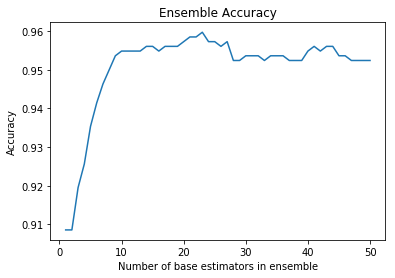

In [75]:
plt.title('Ensemble Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of base estimators in ensemble')

# clf.staged_score
# Return staged scores for X, y.
# This generator method yields the ensemble score after each iteration of boosting and therefore allows monitoring, 
# such as to determine the score on a test set after each boost.
plt.plot(range(1, 51), [accuracy for accuracy in clf.staged_score(X_test, y_test)])

### Stacking

Stacking is an approach to creating ensembles; it uses a meta-estimator to combine the predictions of base estimators. Sometimes called blending, stacking adds a second supervised learning problem: the meta-estimator must be trained to use the predictions of the base estimators to predict the value of the response variable. To train a stacked ensemble, first use the training set to train the base estimators. Unlike bagging and boosting, stacking can use different types of base estimators; a random forest could be combined with a logistic regression classifier, for example. The base estimators' predictions and the ground truth are then used as the training set for the meta-estimator. The meta-estimator can learn to combine the base estimators' predictions in more complex ways than voting or averaging. scikit-learn does not implement a stacking meta-estimator, but we can extend the BaseEstimator class to create our own. In this example, we use a single decision tree as the meta-estimator; the base estimators are a logistic regression classifier and a Random Forest classifier. Rather than using the predicted class labels as features, we use the predicted probabilities of the classes.

In [83]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.base import clone, BaseEstimator, TransformerMixin,ClassifierMixin

In [84]:
class StackingClassifier(BaseEstimator, ClassifierMixin,TransformerMixin):
    def __init__(self, classifiers):
        self.classifiers = classifiers
        self.meta_classifier = DecisionTreeClassifier()

    def fit(self, X, y):
        for clf in self.classifiers: 
            clf.fit(X, y)
        self.meta_classifier.fit(self._get_meta_features(X), y) 
        return self

    def _get_meta_features(self, X):
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers])
        return np.concatenate(probas, axis=1)

    def predict(self, X):
        return self.meta_classifier.predict(self._get_meta_features(X))

    def predict_proba(self, X):
        return self.meta_classifier.predict_proba(self._get_meta_features(X))

In [105]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Logistic regression accuracy: %s' % lr.score(X_test,y_test))


Logistic regression accuracy: 0.9695121951219512


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [110]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=30,random_state=11)
rf_clf.fit(X_train, y_train)
score = rf_clf.score(X_test, y_test)
print('RF accuracy: %s' % score)

RF accuracy: 0.9658536585365853


In [111]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
print('KNN accuracy: %s' % knn_clf.score(X_test, y_test))

KNN accuracy: 0.9560975609756097


In [112]:
base_classifiers = [lr, rf_clf, knn_clf]
stacking_clf = StackingClassifier(base_classifiers)
stacking_clf.fit(X_train, y_train)
print('Stacking classifier accuracy: %s' % stacking_clf.score(X_test, y_test))

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Stacking classifier accuracy: 0.9658536585365853


Accuracy is the same as RF classifer since we are using DecistionTreeClassifier as meta classifer

In [113]:
base_classifiers = [lr, knn_clf]
stacking_clf = StackingClassifier(base_classifiers)
stacking_clf.fit(X_train, y_train)
print('Stacking classifier accuracy: %s' % stacking_clf.score(X_test, y_test))

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Stacking classifier accuracy: 0.9670731707317073


Accuracy is greater than both base classifiers

## Gradient Boosting Machines

Just like random forest, GBM is an ensemble method: we’re going to be making more than one tree, then combining their outputs. Boosting is the central idea here. What is getting the “boost” is the importance of the harder-to-learn training data. Imagine a data set with just 10 rows (10 examples to learn from) and two numeric predictor columns (x1, x2), and we are trying to learn to distinguish between two possible values: circle or cross.
The very simplest decision tree we can make has just one node; we will represent it with a straight line in the following diagrams, which divides our training data into two.

![Fig](imgs/img_019.png)

It scored 60%: six right, four wrong. It called one cross a circle, and there were three circles it thought were crosses. What we do now is train another very simple tree, but first we modify the training data to give the four rows it got wrong a higher weight. How much of a higher weight? That is where the “gradient” bit of GBM comes in (but we don’t need to understand it to use and tune GBMs).
In Figure below I’ve made the circles and crosses for the wrong items bigger, and our next tree pays more attention to them.


![Fig](imgs/img_020.png)

It helped, as it got three of those four right… But it got a different three items wrong, so it still scores 60%. So, for our third tree, we tell it those four are more important; the one it has got wrong twice in a row is the biggest of all. Figure below shows its third attempt.
If we stop training here, we end up with three weak models that scored 60%, 60%, and 80%, respectively. However, at least one of each of those three trees got every training row correct. You can see how they can work together to cover each other’s weaknesses, but hopefully you also got a glimpse of how easy it would be to overfit the data.

![Fig](imgs/img_021.png)

GBM naturally focuses attention on the difficult rows in your training data, the ones that are hard to learn. That is good, but it can also be bad. If there is one outlier that each tree keeps getting wrong it is going to get boosted and boosted until it is bigger than the whole universe. If that outlier is real data (an unusual event, a black swan), then this is good, as it will know what to do when it sees one again. If it was bogus (a measuring error, a typo) it is going to distort your accuracy.

Thus Gradient Boosting Machines (GBM) is an ensembling algorithm. The main idea behind GBM is to take some base model and then fit this model, over and over, to the data, gradually improving the performance. It is different from Random Forest models because GBM tries to improve the results at each step, while random forest builds multiple independent models and takes their average.<br>

Take another example say Linear Regression example. To fit several linear regressions to data, we can do the following:
Fit the base model to the original data. Take the difference between the target value and the prediction of the first model (we call it the residuals of Step 1) and use this for training the second model. Take the difference between the residuals of step 1 and predictions of step 2 (this is the residuals of Step 2) and fit the 3rd model. Continue until you train N models. For predicting, sum up the predictions of all individual models.
So, as you can see, at each step of the algorithm, the model tries to improve the results of the previous step, and by the end, it takes all the models and combines their prediction into the final one.

Essentially, any model can be used as the base model, not only Linear Regression. For example, it could be Logistic Regression or Decision Tree. Typically, tree-based models are very good and show excellent performance on a variety of problems. When we use trees in GBM, the overall model is typically called Gradient Boosted Trees, and depending on the type of the trees, it can be Gradient Boosted Regression Trees or Gradient Boosted Classification Trees. 


### XGBoost

Extreme Gradient Boosting, XGBoost, or XGB for short, is an implementation of Gradient Boosting Machines, and it provides a few base models, including decision trees. The tree-based XGBoost models are very powerful: they do not make any assumptions about the dataset and the distribution of values in its features, they naturally handle missing values,
and they are extremely fast and can efficiently utilize all the available CPUs.

### Example of Binary Classification with XGBoost

[Titanic Machine Learning From Diasaster](https://www.kaggle.com/c/titanic)

![Fig](imgs/img_022.png)

In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Read CSV train data file into DataFrame
train = pd.read_csv("../datasets/titanic/train.csv")

# Read CSV test data file into DataFrame
test = pd.read_csv("../datasets/titanic/test.csv")

# preview train data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
y = train['Survived'].values
train = train.drop('Survived', axis=1)
train = train.drop('PassengerId', axis=1)
test = test.drop('PassengerId', axis=1)
train = train.drop('Name', axis=1)
test = test.drop('Name', axis=1)
data = pd.concat([train, test], axis=0)


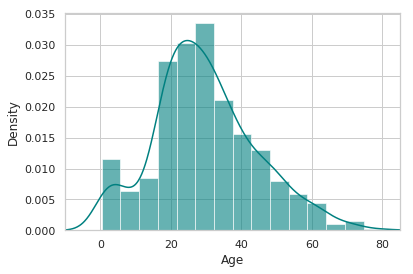

In [4]:
ax = train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [5]:
# mean age
print('The mean of train "Age" is %.2f' %(train["Age"].mean(skipna=True)))
print('The mean of train+test "Age" is %.2f' %(data["Age"].mean(skipna=True)))
# median age
print('The median of train "Age" is %.2f' %(train["Age"].median(skipna=True)))
print('The median of train+test "Age" is %.2f' %(data["Age"].median(skipna=True)))

The mean of train "Age" is 29.70
The mean of train+test "Age" is 29.88
The median of train "Age" is 28.00
The median of train+test "Age" is 28.00


In [6]:
data['Age'].fillna(28.00, inplace=True)

In [7]:
num_cols = ['Fare']
cat_cols = [col for col in list(train.columns) if col not in num_cols ]

In [8]:
ata_num = data[num_cols]
data_cat = pd.DataFrame()

In [9]:
bins = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
cols = ['Age_'+str(x) for x in bins[1:]]
Age_bins = pd.get_dummies(pd.cut(data['Age'], bins))
Age_bins.columns = cols
Age_bins.shape

(1309, 17)

In [10]:
data['Cabin'].fillna('UNK_Cabin', inplace=True)
data['Embarked'].fillna('S', inplace=True)

In [11]:
bins = [i for i in np.arange(515, step=5)]
cols = ['Fare_'+str(x) for x in bins[1:]]
print(cols, len(cols))
Fare_bins = pd.get_dummies(pd.cut(data['Fare'], bins), columns=cols)
Fare_bins.columns = cols
Fare_bins.shape

['Fare_5', 'Fare_10', 'Fare_15', 'Fare_20', 'Fare_25', 'Fare_30', 'Fare_35', 'Fare_40', 'Fare_45', 'Fare_50', 'Fare_55', 'Fare_60', 'Fare_65', 'Fare_70', 'Fare_75', 'Fare_80', 'Fare_85', 'Fare_90', 'Fare_95', 'Fare_100', 'Fare_105', 'Fare_110', 'Fare_115', 'Fare_120', 'Fare_125', 'Fare_130', 'Fare_135', 'Fare_140', 'Fare_145', 'Fare_150', 'Fare_155', 'Fare_160', 'Fare_165', 'Fare_170', 'Fare_175', 'Fare_180', 'Fare_185', 'Fare_190', 'Fare_195', 'Fare_200', 'Fare_205', 'Fare_210', 'Fare_215', 'Fare_220', 'Fare_225', 'Fare_230', 'Fare_235', 'Fare_240', 'Fare_245', 'Fare_250', 'Fare_255', 'Fare_260', 'Fare_265', 'Fare_270', 'Fare_275', 'Fare_280', 'Fare_285', 'Fare_290', 'Fare_295', 'Fare_300', 'Fare_305', 'Fare_310', 'Fare_315', 'Fare_320', 'Fare_325', 'Fare_330', 'Fare_335', 'Fare_340', 'Fare_345', 'Fare_350', 'Fare_355', 'Fare_360', 'Fare_365', 'Fare_370', 'Fare_375', 'Fare_380', 'Fare_385', 'Fare_390', 'Fare_395', 'Fare_400', 'Fare_405', 'Fare_410', 'Fare_415', 'Fare_420', 'Fare_425',

(1309, 102)

In [12]:
from tqdm import tqdm_notebook
data_cat = pd.DataFrame()
for col in tqdm_notebook(cat_cols):
    data[col] = data[col].map(lambda x: col+str(x))
    mydf = pd.get_dummies(data[col])
    if len(data_cat) == 0:
        data_cat = mydf
    else:
        data_cat = pd.concat([data_cat, mydf], axis=1)

In [13]:
data_num = data[['Fare']]
data_num['Fare'] = data_num['Fare'].apply(np.log1p)

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
data2 = data_cat.copy()
data2['Fare'] = data_num['Fare']
data2 = pd.concat([data2, Age_bins], axis=1)
data2 = pd.concat([data2, Fare_bins], axis=1)

In [15]:
from scipy.sparse import csr_matrix, hstack
data_mat_sparse = csr_matrix(data2.values)
data_mat_train = data_mat_sparse[:len(train)]
data_mat_test = data_mat_sparse[len(train):]

In [16]:
from sklearn.model_selection import train_test_split
X = data_mat_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE

In [18]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [19]:
model.score(X_val, y_val)

0.7653631284916201

Accuracy is lower than with logistic regression

### Improve XGBoost hyper parameters

In [20]:
Y = pd.DataFrame()
Y['target'] = y
Y['target'].value_counts()

0    549
1    342
Name: target, dtype: int64

#### scale_pos_weight is the ratio of number of negative class to the positive class

In [21]:
scale_pos_weight = 549/342

In [22]:
xgb1 = XGBClassifier(
    learning_rate =0.001,
    n_estimators=500,
    max_depth=10,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=11)
xgb1.fit(X_train, y_train)
xgb1.score(X_val, y_val)

0.7877094972067039

eta [default=0.3, alias: learning_rate]: Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative.
range: [0,1]<br>

gamma [default=0, alias: min_split_loss]: Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
range: [0,∞]

max_depth [default=6]: Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. 0 indicates no limit. Note that limit is required when grow_policy is set of depthwise.
range: [0,∞] <br>

min_child_weight [default=1]: Minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning. In linear regression task, this simply corresponds to minimum number of instances needed to be in each node. The larger min_child_weight is, the more conservative the algorithm will be.
range: [0,∞] <br>

max_delta_step [default=0]: Maximum delta step we allow each leaf output to be. If the value is set to 0, it means there is no constraint. If it is set to a positive value, it can help making the update step more conservative. Usually this parameter is not needed, but it might help in logistic regression when class is extremely imbalanced. Set it to value of 1-10 might help control the update.
range: [0,∞]<br>

subsample [default=1]: Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration.

range: (0,1]: colsample_bytree, colsample_bylevel, colsample_bynode [default=1] - This is a family of parameters for subsampling of columns. - All colsample_by* parameters have a range of (0, 1], the default value of 1, and

In [108]:
from sklearn.model_selection import GridSearchCV 
param_test = {
    
    'max_depth':range(6,12,2),
    'min_child_weight':range(1,6,2),
    'colsample_bytree':[0.75, 0.8, 0.85],
    'subsample':[0.75, 0.8, 0.85],
    'learning_rate':[0.001, 0.005, 0.01]
}
gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                                 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, 
                                                 seed=27), param_grid = param_test, 
                       scoring='accuracy',n_jobs=-1,iid=False, cv=3, verbose=1)
gsearch.fit(X_train,y_train)


Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed: 31.6min finished


AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [110]:
print(gsearch.score, gsearch.best_params_, gsearch.best_score_)

<bound method BaseSearchCV.score of GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_depth': range(6, 12, 2), 'min_child_weight': range(1, 6, 2), 'colsample_bytree': [0.75, 0.8, 0.85], 'subsample': [0.75, 0.8, 0.85], 'learning_rate': [0.001, 0.005, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)> {'colsample_bytree': 0.8, 'learning_rate': 0.005, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.75} 0.8132113604935646


In [114]:
xgb1 = XGBClassifier(
    learning_rate =0.005,
    n_estimators=500,
    max_depth=6,
    min_child_weight=5,
    gamma=0,
    subsample=0.75,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=11)
xgb1.fit(X_train, y_train)
xgb1.score(X_val, y_val)

0.7877094972067039

Train/Test split results:
XGBClassifier accuracy is 0.788
XGBClassifier log_loss is 0.456
XGBClassifier auc is 0.864


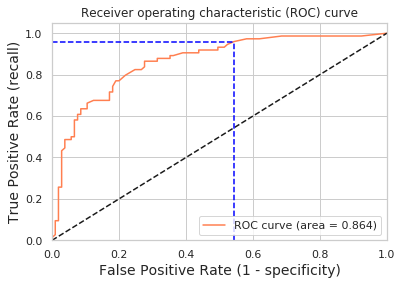

Using a threshold of 0.154 guarantees a sensitivity of 0.959 and a specificity of 0.457, i.e. a false positive rate of 54.29%.


In [112]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss, accuracy_score

model=xgb1
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]
[fpr, tpr, thr] = roc_curve(y_val, y_pred_proba)
print('Train/Test split results:')
print(model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_val, y_pred))
print(model.__class__.__name__+" log_loss is %2.3f" % log_loss(y_val, y_pred_proba))
print(model.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensitivity > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

### Feature Interactions

In [24]:
new_cat_cols = []
for i, col1 in tqdm_notebook(enumerate(cat_cols)):
    print(i)
    for col2 in cat_cols[(i+1):]:
        col = col1 + '_' + col2
        data[col] = data[col1].astype('str') + '_' + data[col2].astype('str')
        new_cat_cols.append(col)

0
1
2
3
4
5
6
7



In [25]:
cat_cols = cat_cols + new_cat_cols

In [26]:
from tqdm import tqdm_notebook
data_cat = pd.DataFrame()
for col in tqdm_notebook(cat_cols):
    data[col] = data[col].map(lambda x: col+str(x))
    mydf = pd.get_dummies(data[col])
    if len(data_cat) == 0:
        data_cat = mydf
    else:
        data_cat = pd.concat([data_cat, mydf], axis=1)

In [115]:
data2 = data_cat.copy()
# data2['Fare'] = data_num['Fare']
data2 = pd.concat([data2, Age_bins], axis=1)
# data2 = pd.concat([data2, Fare_bins], axis=1)
data_mat_sparse = csr_matrix(data2.values)
data_mat_train = data_mat_sparse[:len(train)]
data_mat_test = data_mat_sparse[len(train):]

from sklearn.model_selection import train_test_split
X = data_mat_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb1
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.7877094972067039

Train/Test split results:
XGBClassifier accuracy is 0.788
XGBClassifier log_loss is 0.456
XGBClassifier auc is 0.864


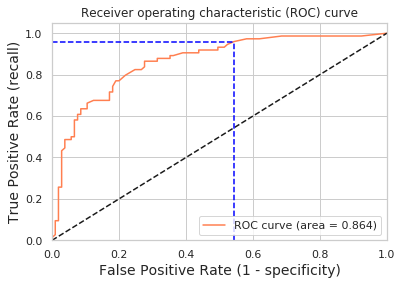

Using a threshold of 0.154 guarantees a sensitivity of 0.959 and a specificity of 0.457, i.e. a false positive rate of 54.29%.


In [116]:
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]
[fpr, tpr, thr] = roc_curve(y_val, y_pred_proba)
print('Train/Test split results:')
print(model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_val, y_pred))
print(model.__class__.__name__+" log_loss is %2.3f" % log_loss(y_val, y_pred_proba))
print(model.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

### LightGBM

Light GBM is a gradient boosting framework from Microsoft that uses tree based learning algorithm.

Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, leaf-wise algorithm can reduce more loss than a level-wise algorithm.

![Fig](imgs/img_023.png)

![Fig](imgs/img_024.png)

The size of data is increasing day by day and it is becoming difficult for traditional data science algorithms to give faster results. Light GBM is prefixed as ‘Light’ because of its high speed. Light GBM can handle the large size of data and takes lower memory to run. Another reason of why Light GBM is popular is because it focuses on accuracy of results. LGBM also supports GPU learning and thus data scientists are widely using LGBM for data science application development.

max_depth: It describes the maximum depth of tree. This parameter is used to handle model overfitting. Any time you feel that your model is overfitted, my first advice will be to lower max_depth.

min_data_in_leaf: It is the minimum number of the records a leaf may have. The default value is 20, optimum value. It is also used to deal over fitting

feature_fraction: Used when your boosting(discussed later) is random forest. 0.8 feature fraction means LightGBM will select 80% of parameters randomly in each iteration for building trees.

bagging_fraction: specifies the fraction of data to be used for each iteration and is generally used to speed up the training and avoid overfitting.

early_stopping_round: This parameter can help you speed up your analysis. Model will stop training if one metric of one validation data doesn’t improve in last early_stopping_round rounds. This will reduce excessive iterations.

lambda: lambda specifies regularization. Typical value ranges from 0 to 1.

min_gain_to_split: This parameter will describe the minimum gain to make a split. It can used to control number of useful splits in tree.

max_cat_group: When the number of category is large, finding the split point on it is easily over-fitting. So LightGBM merges them into ‘max_cat_group’ groups, and finds the split points on the group boundaries, default:64

In [34]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [45]:
X_train.dtype

dtype('uint8')

In [54]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((712, 10993), (712,), (179, 10993), (179,))

In [56]:
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)

In [83]:
model = LGBMClassifier(
    learning_rate =0.01,
    boosting_type = 'gbdt',
    metric='accuracy',
    max_depth=8,
    num_leaves=128,
    bagging_fraction=0.8,
    feature_fraction=0.8,
    objective= 'binary',
    nthread=4,
    scale_pos_weight=1,
    random_state=11)

model.fit(X_train, y_train)

LGBMClassifier(bagging_fraction=0.8, boosting_type='gbdt', class_weight=None,
        colsample_bytree=1.0, feature_fraction=0.8,
        importance_type='split', learning_rate=0.01, max_depth=8,
        metric='accuracy', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, nthread=4,
        num_leaves=128, objective='binary', random_state=11, reg_alpha=0.0,
        reg_lambda=0.0, scale_pos_weight=1, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [84]:
model.score(X_val,y_val)

0.7932960893854749

Train/Test split results:
LGBMClassifier accuracy is 0.793
LGBMClassifier log_loss is 0.481
LGBMClassifier auc is 0.866


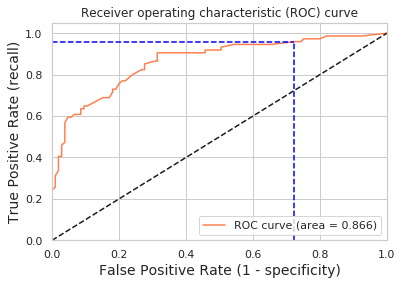

Using a threshold of 0.204 guarantees a sensitivity of 0.959 and a specificity of 0.276, i.e. a false positive rate of 72.38%.


In [85]:
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]
[fpr, tpr, thr] = roc_curve(y_val, y_pred_proba)
print('Train/Test split results:')
print(model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_val, y_pred))
print(model.__class__.__name__+" log_loss is %2.3f" % log_loss(y_val, y_pred_proba))
print(model.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

### Using HyperOpt to tune parameters

[Hyperopt](http://hyperopt.github.io/hyperopt/)

In [ ]:
# params = {}
# params['learning_rate'] = 0.003
# params['boosting_type'] = 'gbdt'
# params['objective'] = 'binary'
# params['metric'] = 'binary_logloss'
# params['sub_feature'] = 0.5
# params['num_leaves'] = 10
# params['min_data'] = 50
# params['max_depth'] = 10

In [97]:
X = X.astype(np.float32)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)

In [102]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from sklearn.model_selection import cross_val_score, StratifiedKFold

def objective(params):
    params = {
        'num_leaves': int(params['num_leaves']),
        'bagging_fraction': '{:.3f}'.format(params['bagging_fraction']),
        'feature_fraction': '{:.3f}'.format(params['feature_fraction']),
        'max_depth': int(params['num_leaves']),
    }
    
    clf = LGBMClassifier(
        learning_rate=0.01,
        **params
    )
    
    score = cross_val_score(clf, X, y, scoring='accuracy', cv=StratifiedKFold()).mean()
    print("Accuracy {:.3f} params {}".format(score, params))
    return score

space = {
    'num_leaves': hp.quniform('num_leaves', 8, 128, 2),
    'bagging_fraction': hp.uniform('bagging_fraction', 0.3, 1.0),
    'feature_fraction': hp.uniform('feature_fraction', 0.3, 1.0),
    'max_depth': hp.quniform('max_depth', 6, 10, 2),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)

/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.805 params {'num_leaves': 40, 'bagging_fraction': '0.712', 'feature_fraction': '0.968', 'max_depth': 40}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.804 params {'num_leaves': 68, 'bagging_fraction': '0.400', 'feature_fraction': '0.348', 'max_depth': 68}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.802 params {'num_leaves': 84, 'bagging_fraction': '0.985', 'feature_fraction': '0.757', 'max_depth': 84}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.802 params {'num_leaves': 94, 'bagging_fraction': '0.778', 'feature_fraction': '0.701', 'max_depth': 94}
Accuracy 0.805 params {'num_leaves': 92, 'bagging_fraction': '0.655', 'feature_fraction': '0.340', 'max_depth': 92}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.804 params {'num_leaves': 118, 'bagging_fraction': '0.511', 'feature_fraction': '0.607', 'max_depth': 118}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.804 params {'num_leaves': 72, 'bagging_fraction': '0.677', 'feature_fraction': '0.387', 'max_depth': 72}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.804 params {'num_leaves': 70, 'bagging_fraction': '0.326', 'feature_fraction': '0.583', 'max_depth': 70}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.804 params {'num_leaves': 86, 'bagging_fraction': '0.674', 'feature_fraction': '0.378', 'max_depth': 86}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.802 params {'num_leaves': 56, 'bagging_fraction': '0.415', 'feature_fraction': '0.742', 'max_depth': 56}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.808 params {'num_leaves': 92, 'bagging_fraction': '0.696', 'feature_fraction': '0.512', 'max_depth': 92}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.802 params {'num_leaves': 18, 'bagging_fraction': '0.839', 'feature_fraction': '0.729', 'max_depth': 18}
Accuracy 0.802 params {'num_leaves': 72, 'bagging_fraction': '0.743', 'feature_fraction': '0.698', 'max_depth': 72}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.801 params {'num_leaves': 72, 'bagging_fraction': '0.673', 'feature_fraction': '0.816', 'max_depth': 72}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.804 params {'num_leaves': 32, 'bagging_fraction': '0.837', 'feature_fraction': '0.564', 'max_depth': 32}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.804 params {'num_leaves': 126, 'bagging_fraction': '0.688', 'feature_fraction': '0.960', 'max_depth': 126}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.804 params {'num_leaves': 42, 'bagging_fraction': '0.945', 'feature_fraction': '0.873', 'max_depth': 42}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.804 params {'num_leaves': 92, 'bagging_fraction': '0.790', 'feature_fraction': '0.883', 'max_depth': 92}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.804 params {'num_leaves': 126, 'bagging_fraction': '0.687', 'feature_fraction': '0.960', 'max_depth': 126}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.801 params {'num_leaves': 54, 'bagging_fraction': '0.602', 'feature_fraction': '0.831', 'max_depth': 54}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.801 params {'num_leaves': 56, 'bagging_fraction': '0.574', 'feature_fraction': '0.825', 'max_depth': 56}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.801 params {'num_leaves': 108, 'bagging_fraction': '0.568', 'feature_fraction': '0.819', 'max_depth': 108}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.804 params {'num_leaves': 108, 'bagging_fraction': '0.510', 'feature_fraction': '0.897', 'max_depth': 108}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.804 params {'num_leaves': 54, 'bagging_fraction': '0.580', 'feature_fraction': '0.790', 'max_depth': 54}
Accuracy 0.801 params {'num_leaves': 8, 'bagging_fraction': '0.506', 'feature_fraction': '0.652', 'max_depth': 8}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.808 params {'num_leaves': 8, 'bagging_fraction': '0.472', 'feature_fraction': '0.500', 'max_depth': 8}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.804 params {'num_leaves': 108, 'bagging_fraction': '0.598', 'feature_fraction': '0.919', 'max_depth': 108}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.804 params {'num_leaves': 16, 'bagging_fraction': '0.329', 'feature_fraction': '0.632', 'max_depth': 16}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.805 params {'num_leaves': 42, 'bagging_fraction': '0.397', 'feature_fraction': '0.460', 'max_depth': 42}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.801 params {'num_leaves': 32, 'bagging_fraction': '0.563', 'feature_fraction': '0.999', 'max_depth': 32}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.805 params {'num_leaves': 26, 'bagging_fraction': '0.623', 'feature_fraction': '0.972', 'max_depth': 26}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.801 params {'num_leaves': 62, 'bagging_fraction': '0.448', 'feature_fraction': '0.843', 'max_depth': 62}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.801 params {'num_leaves': 32, 'bagging_fraction': '0.423', 'feature_fraction': '0.999', 'max_depth': 32}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.801 params {'num_leaves': 34, 'bagging_fraction': '0.369', 'feature_fraction': '0.994', 'max_depth': 34}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.804 params {'num_leaves': 46, 'bagging_fraction': '0.356', 'feature_fraction': '0.928', 'max_depth': 46}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.802 params {'num_leaves': 48, 'bagging_fraction': '0.460', 'feature_fraction': '0.677', 'max_depth': 48}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.802 params {'num_leaves': 78, 'bagging_fraction': '0.932', 'feature_fraction': '0.766', 'max_depth': 78}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.802 params {'num_leaves': 104, 'bagging_fraction': '0.549', 'feature_fraction': '0.774', 'max_depth': 104}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.804 params {'num_leaves': 116, 'bagging_fraction': '0.633', 'feature_fraction': '0.863', 'max_depth': 116}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.804 params {'num_leaves': 12, 'bagging_fraction': '0.508', 'feature_fraction': '0.650', 'max_depth': 12}
Accuracy 0.805 params {'num_leaves': 62, 'bagging_fraction': '0.738', 'feature_fraction': '0.553', 'max_depth': 62}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.802 params {'num_leaves': 62, 'bagging_fraction': '0.457', 'feature_fraction': '0.723', 'max_depth': 62}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.801 params {'num_leaves': 22, 'bagging_fraction': '0.369', 'feature_fraction': '0.949', 'max_depth': 22}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.804 params {'num_leaves': 84, 'bagging_fraction': '0.319', 'feature_fraction': '0.316', 'max_depth': 84}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.804 params {'num_leaves': 100, 'bagging_fraction': '0.538', 'feature_fraction': '0.801', 'max_depth': 100}
Accuracy 0.806 params {'num_leaves': 22, 'bagging_fraction': '0.393', 'feature_fraction': '0.422', 'max_depth': 22}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.801 params {'num_leaves': 54, 'bagging_fraction': '0.796', 'feature_fraction': '0.839', 'max_depth': 54}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.804 params {'num_leaves': 38, 'bagging_fraction': '0.827', 'feature_fraction': '0.907', 'max_depth': 38}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.804 params {'num_leaves': 78, 'bagging_fraction': '0.904', 'feature_fraction': '0.601', 'max_depth': 78}


/home/watts/anaconda3/envs/itv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:598: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Accuracy 0.802 params {'num_leaves': 26, 'bagging_fraction': '0.994', 'feature_fraction': '0.681', 'max_depth': 26}


In [104]:
print("Hyperopt estimated optimum {}".format(best))

Hyperopt estimated optimum {'bagging_fraction': 0.6725614663256765, 'feature_fraction': 0.8159613605881573, 'max_depth': 6.0, 'num_leaves': 72.0}


In [105]:
model = LGBMClassifier(
    learning_rate =0.01,
    boosting_type = 'gbdt',
    metric='accuracy',
    max_depth=6,
    num_leaves=72,
    bagging_fraction=0.6725614663256765,
    feature_fraction=0.8159613605881573,
    objective= 'binary',
    nthread=4,
    scale_pos_weight=1,
    random_state=11)

model.fit(X_train, y_train)

LGBMClassifier(bagging_fraction=0.6725614663256765, boosting_type='gbdt',
        class_weight=None, colsample_bytree=1.0,
        feature_fraction=0.8159613605881573, importance_type='split',
        learning_rate=0.01, max_depth=6, metric='accuracy',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, nthread=4, num_leaves=72,
        objective='binary', random_state=11, reg_alpha=0.0, reg_lambda=0.0,
        scale_pos_weight=1, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [106]:
model.score(X_val, y_val)

0.7932960893854749

Train/Test split results:
LGBMClassifier accuracy is 0.793
LGBMClassifier log_loss is 0.482
LGBMClassifier auc is 0.868


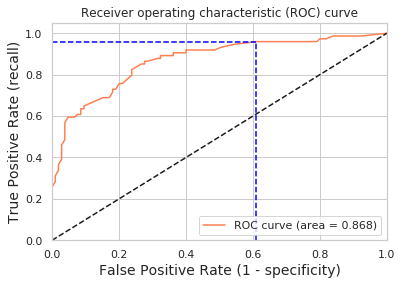

Using a threshold of 0.222 guarantees a sensitivity of 0.959 and a specificity of 0.390, i.e. a false positive rate of 60.95%.


In [107]:
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)[:, 1]
[fpr, tpr, thr] = roc_curve(y_val, y_pred_proba)
print('Train/Test split results:')
print(model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_val, y_pred))
print(model.__class__.__name__+" log_loss is %2.3f" % log_loss(y_val, y_pred_proba))
print(model.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensitivity > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))